In [1]:
from geomdl import NURBS
from geomdl.visualization import VisMPL
import numpy as np
from matplotlib import cm

In [2]:
def construct_arc(alpha, z=0, r=1, show=False):
    if alpha > 1 or alpha <= 0:
        raise Exception('alpha must be strictly greater than 0 and equal to or less than 1')
    elif 0 < alpha and alpha <= 0.25:
        theta = alpha*2*np.pi
        w = np.cos(theta/2)
        s = 1/np.cos(theta/2)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[r*1, r*0, z, 1], [r*w*s*np.cos(theta/2), r*w*s*np.sin(theta/2), z*w, w], [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv.knotvector = [0, 0, 0,  1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        if show == False:
            return crv.ctrlptsw, crv.knotvector
        elif show == True: 
            crv.render()
            return crv.ctrlptsw, crv.knotvector
    elif 0.25 < alpha and alpha <= 0.50:
        theta = alpha*2*np.pi
        w = np.cos(theta/4)
        s = 1/np.cos(theta/4)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/4), r*w*s*np.sin(theta/4), z*w, w], 
                        [r*np.cos(theta/2), r*np.sin(theta/2), z, 1],
                        [r*w*s*np.cos(3*theta/4), r*w*s*np.sin(3*theta/4), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv.knotvector = [0, 0, 0, 0.5, 0.5, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        if show == False:
            return crv.ctrlptsw, crv.knotvector
        elif show == True: 
            crv.render()
            return crv.ctrlptsw, crv.knotvector
    elif 0.5 < alpha and alpha <= 0.75:
        theta = alpha*2*np.pi
        w = np.cos(theta/6)
        s = 1/np.cos(theta/6)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/6), r*w*s*np.sin(theta/6), z*w, w], 
                        [r*np.cos(theta/3), r*np.sin(theta/3), z, 1],
                        [r*w*s*np.cos(theta/2), r*w*s*np.sin(theta/2), z*w, w],
                        [r*np.cos(2*theta/3), r*np.sin(2*theta/3), z, 1],
                        [r*w*s*np.cos(5*theta/6), r*w*s*np.sin(5*theta/6), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv.knotvector = [0, 0, 0, 1/3, 1/3, 2/3, 2/3, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        if show == False:
            return crv.ctrlptsw, crv.knotvector
        elif show == True: 
            crv.render()
            return crv.ctrlptsw, crv.knotvector
    elif 0.75 < alpha and alpha <= 1:
        theta = alpha*2*np.pi
        w = np.cos(theta/8)
        s = 1/np.cos(theta/8)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/8), r*w*s*np.sin(theta/8), z*w, w], 
                        [r*np.cos(theta/4), r*np.sin(theta/4), z, 1],
                        [r*w*s*np.cos(3*theta/8), r*w*s*np.sin(3*theta/8), z*w, w],
                        [r*np.cos(theta/2), r*np.sin(theta/2), z, 1],
                        [r*w*s*np.cos(5*theta/8), r*w*s*np.sin(5*theta/8), z*w, w],
                        [r*np.cos(3*theta/4), r*np.sin(3*theta/4), z, 1],
                        [r*w*s*np.cos(7*theta/8), r*w*s*np.sin(7*theta/8), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv.knotvector = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        if show == False:
            return crv.ctrlptsw, crv.knotvector
        elif show == True: 
            crv.render()
            return crv.ctrlptsw, crv.knotvector

In [3]:
# Control points
def construct_torus(alpha, x, z, r):
    ctrlpts = [construct_arc(alpha, z, x-r)[0], 
           construct_arc(alpha, z+r, x-r)[0],
           construct_arc(alpha, z+r, x)[0],
           construct_arc(alpha, z+r, x+r)[0],
           construct_arc(alpha, z, x+r)[0],
           construct_arc(alpha, z-r, x+r)[0],
           construct_arc(alpha, z-r, x)[0],
           construct_arc(alpha, z-r, x-r)[0], 
           construct_arc(alpha, z, x-r)[0]]

    # Generate surface
    surf = NURBS.Surface()
    surf.degree_u = 2
    surf.degree_v = 2
    surf.ctrlpts2d = ctrlpts
    surf.knotvector_u = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]
    surf.knotvector_v = construct_arc(alpha, 0, 1)[1]
    surf.sample_size = 30

# Visualize surface
    surf.vis = VisMPL.VisSurfTriangle()
    surf.render(colormap=cm.summer)

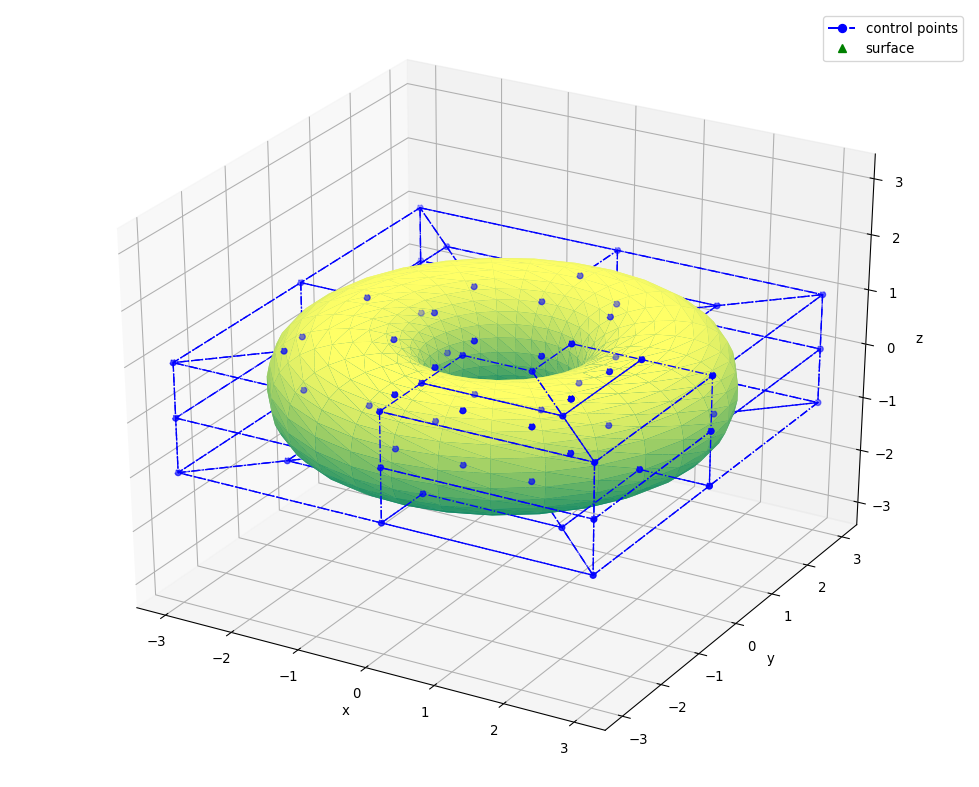

In [4]:
construct_torus(1, 2, 0, 1)